# Trabajo Práctico: Procesamiento de datos

En la carpeta `data` se encuentra los datos crudos de ventas durante el 2022 de las diferentes sedes de una cadeda de tiendas DuttyFree ubicadas en distintos aeropuertos del país. Esta información se encuentra en distintos archivos en formato `.parquet` los cuales deben ser reconstruidos. La compañía desea analizar los datos para apoyar su proceso de toma de decisiones. Sin embargo, estos datos son recolectados manualmente desde cada una de las sedes por lo que se requiere previamente realizar una limpieza y procesamiento de los datos.

## Carga de configuraciones:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import os
#pd.set_option('max_columns', 50)

## Reconstrucción de los datos

Para manejar datos de archivos `.parquet` se requiere tener instalado uno de los siguientes paquetes: `pyarrow` o `fastparquet`. Para instalarlos, ejecute alguno de los siguientes comandos:

```
!pip install pyarrow
!pip install fastparquet
```

Lea y reconstruya los datos unificandolos en un mismo DataFrame. Luego, conteste las siguientes preguntas:

### 1. ¿Cuántos registros tienen los datos?
    R/= Hay 781632 registros.
    
### 2. ¿Cuántas columnas tienen los datos?
    R/= Hay 29 columnas.
    
### 3. De una breve explicación de los datos que contiene cada columna.
    R/= id_tienda: Identificador único para cada tienda.
        nombre_tienda: Nombre de la tienda.
        sigla: Siglas de la ciudad donde está ubicada la tienda.
        aeropuerto: Nombre del aeropuerto de la ciudad donde está ubicado la tienda.
        latitud: Latitud de la geolocalización de la tienda.
        longitud: Longitud de la geolocalización de la tienda.
        ciudad: Nombre de la ciudad donde está ubicada la tienda.
        region: Región donde está ubicada la tienda.
        id_compra: Identificador único de una compra realizada.
        moneda: Tipo de divisa con la que se realizó la compra.
        monto: Valor de la venta SIN IVA.
        tipo_viaje: Tipo de viaje, puede ser Nacional, Local o Inteternacional.
        tipo_transito: Si el viaje fue una llegada o una salida.
        nacionalidad: Nacionalidad de la persona, puede ser Colombiano o extranjero.
        fecha: Fecha en que se realizó la compra.do
        hora: Hora en la que se realizó la compra.
        minuto: Minuto en el que se realizó la compra.
        medio_pago: El medio de pago que se realizó la compra (Tarjeta o efectivo).
        franquicia_tdc: En caso de ser el medio de pago de la tarjeta, la franquicia con la que se realizó la compra.
        porcentaje_iva: Porcentaje del IVA de la venta.
        monto_iva: Valor del IVA en la venta (precio de la venta * porcentaje del IVA)
        lleva_bolsa_plastica: 1 = Lleva bolsa plástica, 0 = NO lleva bolsa plástica.
        lleva_alcohol: 1 = Lleva alcohol, 0 = NO lleva alcohol.
        lleva_tabaco: 1 = Lleva tabaco, 0 = NO lleva tabaco.
        lleva_libros: 1 = Lleva libros, 0 = NO lleva libros.
        monto_pagado: El valor que se pagó en la compra (Es una combinación entre la columna "moneda" y "monto").
        monto_pagado_cop: El valor en pesos colombianos pagado.
        monto_pagado_usd: El valor en dólares americanos pagado.
        monto_pagado_eur: El valor en Euros pagado.
        
### 4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
        id_tienda: Es un identificador único para la tienda en la que se realizó el registro. Existen registros duplicados,
        pues se pueden hacer muchas compras en la misma tienda.
        
        id_compra: Es un identificador único que hace referencia a la compra. No existen registros duplicados, pues no pueden
        haber compras repetidas.
        
### 5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?
        moneda: Existen valores redundantes, por ejemplo: COP, pesos colombianos; dólares americanos, USD; EUR, euros. Es lo mismo,
        pero en distintas formas de expresarse.
        
        monto: El problema que existe con esta columna, es que hay montos en distintas divisas. Sería mucho más sencillo manejar
        todo en una misma divisa haciendo la conversión correspondiente.
        
        tipo_transito: Lo valores con mismo significado son: Llegada, Arrival; Departure, Salida. Se refieren a lo mismo, pero en
        distinto idioma.
        
        medio_pago: Los valores redundantes son: TDC, Tarjeta; Cash, Efectivo. En el primer caso, TDC son las siglas de tarjeta
        de crédito, y en el segundo caso, es lo mismo en distintos idiomas.
        
        franquicia_tdc: Los valores redundantes son: AMEX, American Express: MCD, Mastercad. Se refieren a lo mismo puesto que
        son las siglas del nombre de la tarjeta.
        
        monto_pagado: Hay válores que son redundantes, y la razón es porque esta columna es la concatenación entre "monto" y
        "moneda", al moneda tener el mismo problema, esta columna heredó el mismo problema.

In [2]:
#Se crea una lista con cada uno de los archivos usando listdir
list_files = os.listdir('data/')
list = []

#Se lee cada archivo, creando un DataFrame.
for f in list_files:
    data = pd.read_parquet('data/'+f)
    list.append(data)
    
#La lista "list" contiene todos los dataframe, con concat, se unifican en un sólo DataFrame.    
ventas_data = pd.concat(list, ignore_index = True)

#ventas_data.head(200).to_csv('data/ventas_data.csv') #Exportar los primeros 200 datos del dataframe a un csv.
ventas_data

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,0.19,5.3694,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,...,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,...,0.19,9158.0000,1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,...,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,...,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,...,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,...,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,...,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,...,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


## Manipulación de datos

Luego de reconstruir y analizar los datos, se identificaron opciones de mejorar la calidad de los datos. Realice:

1. Elimine columnas que contengan datos duplicados.
2. Para las columnas categóricas, unifique los valores con significados duplicados.

In [3]:
ventas_data = ventas_data.drop(['monto_pagado','monto_pagado_cop','monto_pagado_usd','monto_pagado_eur'], axis = 1) 
ventas_data

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,2,5,TDC,Mastercard,0.19,5.3694,1.0,1.0,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,...,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,...,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,...,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,...,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,...,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,...,15,47,Tarjeta,Mastercard,NaN,NaN,1.0,0.0,0.0,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,...,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,...,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN


In [4]:
#Normalizando columna "moneda"
update = ventas_data['moneda'] == 'pesos colombianos'
ventas_data.loc[update, 'moneda'] = 'COP'

update = ventas_data['moneda'] == 'dolares americanos'
ventas_data.loc[update, 'moneda'] = 'USD'

update = ventas_data['moneda'] == 'euros'
ventas_data.loc[update, 'moneda'] = 'EUR'

#Normalizando columna "tipo_transito"
update = ventas_data['tipo_transito'] == 'Arrival'
ventas_data.loc[update, 'tipo_transito'] = 'Llegada'

update = ventas_data['tipo_transito'] == 'Departure'
ventas_data.loc[update, 'tipo_transito'] = 'Salida'

#Normalizando columna "medio_pago"
update = ventas_data['medio_pago'] == 'Tarjeta'
ventas_data.loc[update, 'medio_pago'] = 'TDC'

update = ventas_data['medio_pago'] == 'Cash'
ventas_data.loc[update, 'medio_pago'] = 'Efectivo'

#Normalizando columna "franquicia_tdc"
update = ventas_data['franquicia_tdc'] == 'American Express'
ventas_data.loc[update, 'franquicia_tdc'] = 'AMEX'

update = ventas_data['franquicia_tdc'] == 'Mastercard'
ventas_data.loc[update, 'franquicia_tdc'] = 'MCD'

ventas_data.loc[0:10, ['moneda', 'tipo_transito','medio_pago','franquicia_tdc']]

,moneda,tipo_transito,medio_pago,franquicia_tdc
0,EUR,Llegada,TDC,MCD
1,COP,Llegada,Efectivo,None
2,COP,Salida,TDC,MCD
3,USD,Salida,TDC,VISA
4,EUR,Salida,TDC,AMEX
5,USD,Salida,TDC,AMEX
6,COP,Llegada,TDC,VISA
7,COP,Salida,Efectivo,None
8,COP,Salida,Efectivo,None
9,COP,Llegada,TDC,AMEX


## Agrupación de datos

Luego de haber hecho una limpieza de datos, conteste las siguientes preguntas:

1. ¿Cuánto fue el total de ventas de cada tienda?
2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.
3. ¿Cuánto fue el total de ventas de cada zona?
4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
5. ¿Qué porcentaje de compras llevaron bolsas?
6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
7. ¿Cúal fue el día con mayor cantidad de transacciones?
8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
9. ¿Cuál fue el mes con menos cantidad de transacciones?
10. ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?

In [5]:
#1. ¿Cuánto fue el total de ventas de cada tienda?
ventas_data[['id_tienda','monto','moneda']].groupby(['id_tienda','moneda']).sum()

monto
id_tienda moneda              
100       COP     6.564595e+09
          EUR     4.054293e+06
          USD     4.063176e+06
200       COP     6.664729e+09
          EUR     4.032536e+06
          USD     4.020532e+06
300       COP     6.504849e+09
          EUR     4.027390e+06
          USD     3.997522e+06
400       COP     6.703892e+09
          EUR     4.071416e+06
          USD     4.024400e+06
500       COP     6.653404e+09
          EUR     4.029221e+06
          USD     4.047998e+06
600       COP     6.713256e+09
          EUR     4.056885e+06
          USD     4.028311e+06
700       COP     6.553467e+09
          EUR     4.031867e+06
          USD     4.051381e+06
800       COP     6.581329e+09
          EUR     4.010840e+06
          USD     4.062870e+06
900       COP     6.687133e+09
          EUR     4.028393e+06
          USD     4.082580e+06
1000      COP     6.657231e+09
          EUR     4.059786e+06
          USD     4.081037e+06

In [6]:
#2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.
#Unificar las divisas de la columna "monto" realizando las conversaciones a COP
update = ventas_data['moneda'] == 'EUR'
ventas_data.loc[update, 'monto_cop'] = ventas_data['monto']*5159.41 #Taza de conversión 14/02/2023 1EUR = 5159.41COP

update = ventas_data['moneda'] == 'USD'
ventas_data.loc[update, 'monto_cop'] = ventas_data['monto']*4792.30 #Taza de conversión 13/02/2023 1USD = 4792.30COP

ventas_data[['id_tienda','monto_cop']].groupby(['id_tienda']).sum()

,monto_cop
id_tienda,
100,4.038972e+10
200,4.007310e+10
300,3.993628e+10
400,4.029224e+10
500,4.018762e+10
600,4.023601e+10
700,4.021749e+10
800,4.016406e+10
900,4.034908e+10


In [7]:
#3. ¿Cuánto fue el total de ventas de cada zona?
ventas_data[['region','monto','moneda']].groupby(['region','moneda']).sum()

monto
region       moneda              
Centro       COP     1.326672e+10
             EUR     8.088752e+06
             USD     8.079691e+06
Costa        COP     1.992569e+10
             EUR     1.209902e+07
             USD     1.222649e+07
Eje Cafetero COP     1.973417e+10
             EUR     1.211422e+07
             USD     1.208123e+07
Sur          COP     1.335730e+10
             EUR     8.100637e+06
             USD     8.072398e+06

In [8]:
#4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
ventas_data[['region','monto_cop']].groupby(['region']).sum()

,monto_cop
region,
Centro,8.045349e+10
Costa,1.210168e+11
Eje Cafetero,1.203991e+11
Sur,8.047986e+10


In [9]:
#5. ¿Qué porcentaje de compras llevaron bolsas?
# Rellenar valores nulos por 0
ventas_data['lleva_bolsa_plastica'] = ventas_data['lleva_bolsa_plastica'].fillna(0.0)

cantidad_compras_bolsa = ventas_data.loc[ventas_data['lleva_bolsa_plastica'] == 1.0, 'lleva_bolsa_plastica'].sum()
total_ventas = len(ventas_data.index)
print('Cantidad de ventas: ',total_ventas)
print('Ventas que llevaron bolsas: ',cantidad_compras_bolsa)
porcentaje = cantidad_compras_bolsa / total_ventas

print('Porcentaje de ventas que llevaron bolsa: ', porcentaje*100, '%')

Cantidad de ventas:  781632
Ventas que llevaron bolsas:  390229.0
Porcentaje de ventas que llevaron bolsa:  49.92490072054368 %


In [10]:
#6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
ventas_data[['monto_iva','moneda']].groupby(['moneda']).sum()

,monto_iva
moneda,
COP,8.401466e+09
EUR,5.113605e+06
USD,5.134489e+06


In [11]:
#7. ¿Cúal fue el día con mayor cantidad de transacciones?
#Creamos una nueva columna con los días de la semana.
ventas_data['dia_semana'] = ventas_data['fecha'].dt.strftime("%A")

dia_mas_ventas = ventas_data['dia_semana'].value_counts().idxmax()
print("El día con más ventas fue: ", dia_mas_ventas)

El día con más ventas fue:  Saturday


In [12]:
#8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
ventas_data[['franquicia_tdc','monto','moneda']].groupby(['franquicia_tdc','moneda']).sum()

monto
franquicia_tdc moneda              
AMEX           COP     1.333207e+10
               EUR     8.075986e+06
               USD     8.058273e+06
MCD            COP     1.317345e+10
               EUR     8.051386e+06
               USD     8.149594e+06
VISA           COP     6.669599e+09
               EUR     4.051137e+06
               USD     4.033861e+06

In [13]:
#9. ¿Cuál fue el mes con menos cantidad de transacciones?
#Creamos una nueva columna con el nombre de los meses
ventas_data['mes'] = ventas_data['fecha'].dt.month_name()
ventas_data

mes_menos_ventas = ventas_data['mes'].value_counts().idxmin()
print('El mes con menos ventas fue: ', mes_menos_ventas)

El mes con menos ventas fue:  February


In [14]:
#10 ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
ventas_data[['id_tienda', 'dia_semana']].groupby(['dia_semana']).value_counts()

dia_semana  id_tienda
Friday      700          11276
            1000         11205
            800          11163
            200          11152
            900          11150
            600          11147
            400          11119
            100          11118
            300          11102
            500          10945
Monday      1000         11205
            400          11202
            100          11200
            500          11185
            200          11117
            300          11096
            700          11087
            600          11076
            900          11055
            800          10986
Saturday    200          11520
            900          11503
            600          11501
            1000         11456
            400          11436
            700          11377
            500          11370
            100          11360
            800          11348
            300          11343
Sunday      900          11437
            400  

# Gráficas de datos

Realice los siguientes gráficos:

1. Un histograma de frecuencias de la cantidad de ventas por día.
2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas
5. Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

`TIP`: utilice [matplotlib](https://matplotlib.org/cheatsheets/) para realizar los gráficos.



<AxesSubplot:>

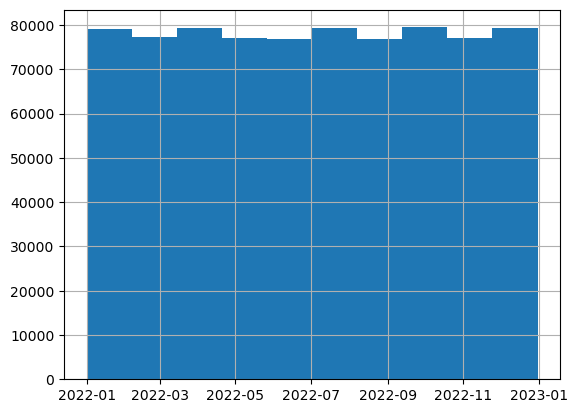

In [15]:
#1. Un histograma de frecuencias de la cantidad de ventas por día.
ventas_data['fecha'].hist()

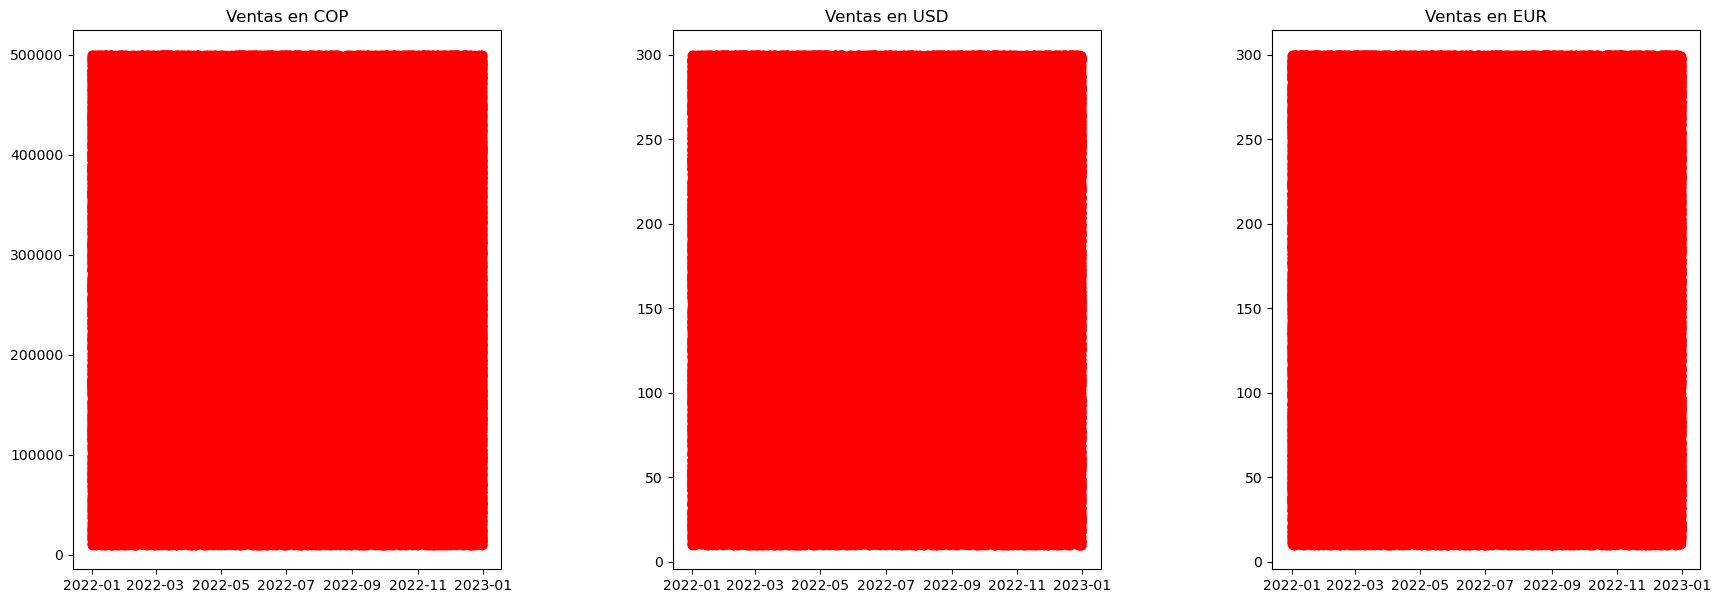

In [16]:
#2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
# Crear la figura y los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# Graficar en el primer subplot
data = ventas_data.loc[ventas_data['moneda'] == 'COP']
ax1.plot(data['fecha'], data['monto'], 'ro')
ax1.set_title('Ventas en COP')

# Graficar en el segundo subplot
data = ventas_data.loc[ventas_data['moneda'] == 'USD']
ax2.plot(data['fecha'], data['monto'], 'ro')
ax2.set_title('Ventas en USD')

# Graficar en el tercer subplot
data = ventas_data.loc[ventas_data['moneda'] == 'EUR']
ax3.plot(data['fecha'], data['monto'], 'ro')
ax3.set_title('Ventas en EUR')

# Ajustar el espacio entre los subplots para evitar superposiciones
plt.subplots_adjust(wspace=0.4)

# Mostrar el gráfico
plt.show()

In [17]:
#3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
ventas_por_tienda = ventas_data.groupby([ventas_data['id_tienda']])['monto_cop'].sum().reset_index()


'''
#Crear Figura
fig, ax = plt.subplots()
ax.bar(ventas_por_tienda['id_tienda'], ventas_por_tienda['monto_cop'])

# Agrega etiquetas y título
ax.set_xlabel('Tienda')
ax.set_ylabel('Monto de ventas (COP)')
ax.set_title('Total del monto de ventas por tienda durante el año')

# Muestra el gráfico
plt.show()
'''
ventas_por_tienda

,id_tienda,monto_cop
0,100,4.038972e+10
1,200,4.007310e+10
2,300,3.993628e+10
3,400,4.029224e+10
4,500,4.018762e+10
5,600,4.023601e+10
6,700,4.021749e+10
7,800,4.016406e+10
8,900,4.034908e+10
9,1000,4.050365e+10


In [18]:
#4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas

In [19]:
#5. Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31).
#Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

## Visualizaciones adicionales: Mapas

Los datos poseen latitud y longitud de cada una de las sedes de la compañía. Realice un Mapa interactivo donde coloque un marcador en cada una de las sedes y que adicional muestre:

- Nombre de la tienda.
- ID de la tienda.
- Aeropuerto y ciudad.
- Sigla del aeropuerto.
- Región.
- Cantidad de ventas realizadas.
- Suma total de las ventas (En COP).

`TIP`: Puede utilizar (Folium)[https://python-visualization.github.io/folium/quickstart.html] para realizar el mapa.